In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## I. Download Dataset

### 1.1 Vietnamese_Dataset
https://github.com/VinAIResearch/dict-guided#dataset

Input format: x1,y1,x2,y2,x3,y3,x4,y4,TRANSCRIPT

In [3]:
%cd /content
!gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
!unzip vietnamese_original.zip

/content
Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/vietnamese_original.zip
100% 1.05G/1.05G [00:12<00:00, 86.6MB/s]
Archive:  vietnamese_original.zip
   creating: vietnamese/
  inflating: vietnamese/general_dict.txt  
  inflating: vietnamese/vn_dictionary.txt  
   creating: vietnamese/train_images/
  inflating: vietnamese/train_images/im0722.jpg  
  inflating: vietnamese/train_images/im0234.jpg  
  inflating: vietnamese/train_images/im0781.jpg  
  inflating: vietnamese/train_images/im0318.jpg  
  inflating: vietnamese/train_images/im0851.jpg  
  inflating: vietnamese/train_images/im1022.jpg  
  inflating: vietnamese/train_images/im0041.jpg  
  inflating: vietnamese/train_images/im1090.jpg  
  inflating: vietnamese/train_images/im0674.jpg  
  inflating: vietnamese/train_images/im1013.jpg  
  inflating: vietnamese/train_images/im0200.jpg  
  inflating: vietnamese/train_images/im1062.jpg  
  inflating: vietnamese/train_images/im0190

## II. Clone Code PaddleOCR

In [4]:
%cd /content
!git clone https://github.com/dotrannhattuong/Smart_menu_OCR.git

/content
Cloning into 'Smart_menu_OCR'...
remote: Enumerating objects: 491, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 491 (delta 53), reused 94 (delta 27), pack-reused 367
Receiving objects: 100% (491/491), 92.84 MiB | 23.37 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [5]:
%cd /content
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47598, done.
remote: Counting objects: 100% (839/839), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 47598 (delta 540), reused 672 (delta 445), pack-reused 46759
Receiving objects: 100% (47598/47598), 345.06 MiB | 29.60 MiB/s, done.
Resolving deltas: 100% (33553/33553), done.
Updating files: 100% (1892/1892), done.


## III. Install Enviroment

In [6]:
# %cd /content/PaddleOCR
# !pip install -r requirements.txt
# !pip install paddlepaddle-gpu
# !pip install PyYAML==5.4.1
# !pip3 install paddleslim==2.2.2
# !pip install split-folders
# !pip3 install lanms-nova

# !pip install paddlepaddle (bug: Installing build dependencies ... done
#                            error: subprocess-exited-with-error)
# sửa lại thứ tự các lib 1 tí
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install PyYAML==5.4.1
!pip3 install paddleslim==2.2.2
!pip install split-folders
!pip3 install lanms-nova
!pip install paddlepaddle-gpu


/content/PaddleOCR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.0 MB/s eta 0:00:00
  Attempting u

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## V. Text Recognition

Text Recognition: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/recognition_en.md

### 5.1 Image Processing

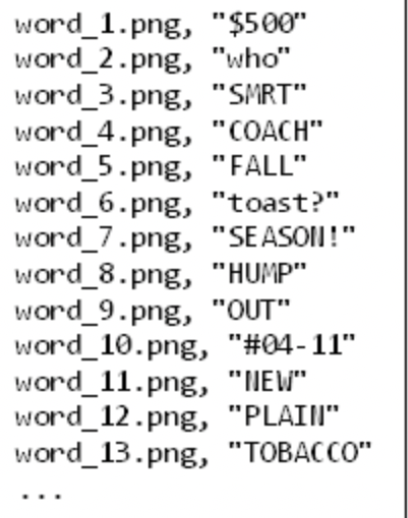

#### 5.1.1 Vietnamese_Data

In [8]:
import os

path = '/content/vietnamese/test_image'
files_test_image = os.listdir(path)
print('len_test: ', len(files_test_image))
print('min_test: ', min(files_test_image))
print('max_test: ', max(files_test_image))
print('-'*60)

path = '/content/vietnamese/train_images'
files = os.listdir(path)
print('len_train: ', len(files))
print('min_train: ', min(files))
print('max_train: ', max(files))
print('-'*60)

path = '/content/vietnamese/unseen_test_images'
files = os.listdir(path)
print('len_unseen: ', len(files))
print('min_unseen: ', min(files))
print('max_unseen: ', max(files))
print('-'*60)

path = '/content/vietnamese/labels'
files = [int(fl.split('.txt')[0].split('_')[1]) for fl in os.listdir(path)]
print('len_label: ', len(files))
print('min_label: ', min(files))
print('max_label: ', max(files))

len_test:  300
min_test:  im1201.jpg
max_test:  im1500.jpg
------------------------------------------------------------
len_train:  1200
min_train:  im0001.jpg
max_train:  im1200.jpg
------------------------------------------------------------
len_unseen:  500
min_unseen:  im1501.jpg
max_unseen:  im2000.jpg
------------------------------------------------------------
len_label:  2000
min_label:  1
max_label:  2000


In [9]:
# Tách label.txt thành train, test, val
import glob
import json

path = glob.glob('/content/vietnamese/labels/*')

train_label = open("/content/vietnamese/train_label.txt","w")
test_label = open("/content/vietnamese/test_label.txt","w")
useen_label = open("/content/vietnamese/useen_label.txt","w")

for file in path:
  with open(file, 'r') as f:
    lines = f.readlines()

  label = []
  for line in lines:
    line = line.strip()
    text_box = {}
    c = line.split(',', 8)
    text_box["transcription"] = c[-1]
    text_box["points"] = [[c[0],c[1]],[c[2],c[3]], [c[4],c[5]],[c[6],c[7]]]
    label.append(text_box)

  label = json.dumps(label, ensure_ascii=False)
  label_name = os.path.basename(file).split('.')[0].split('_')[1]
  int_number = int(label_name)
  img_name = 'im' + "{:04n}".format(int(int_number)) + '.jpg'

  if int_number <= 1200:
    train_label.write('train_images/' + img_name + '\t' + f'{label}' + '\n')
  elif int_number > 1500:
    useen_label.write('unseen_test_images/' + img_name + '\t' + f'{label}' + '\n')
  else:
    test_label.write('test_image/' + img_name + '\t' + f'{label}' + '\n')

In [10]:
# Kiểm tra việc chia train, test, valid hoàn tất chưa
import os

test_label = '/content/vietnamese/test_label.txt'
with open(test_label, 'r') as f:
  lines = f.readlines()
print("test_label: {}".format(len(lines)))

train_label = '/content/vietnamese/train_label.txt'
with open(train_label, 'r') as f:
  lines = f.readlines()
print("train_labels: {}".format(len(lines)))

useen_label = '/content/vietnamese/useen_label.txt'
with open(useen_label, 'r') as f:
  lines = f.readlines()
print("useen_label: {}".format(len(lines)))

test_label: 294
train_labels: 1200
useen_label: 496


In [11]:
%cd /content/PaddleOCR


/content/PaddleOCR


In [12]:
!pip install paddlepaddle-gpu

In [13]:
# crop data

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name +'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

if not os.path.exists('/content/dataset_crop'):
    os.makedirs('/content/dataset_crop')

if not os.path.exists('/content/dataset_crop/train_images'):
    os.makedirs('/content/dataset_crop/train_images')

crop_label = open('/content/dataset_crop/crop_train_label.txt','w')
with open('/content/vietnamese/train_label.txt','r') as file_text:
  img_files=file_text.readlines()

count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]

  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]

  print_draw_crop_rec_res(img_crop_list,img_name)

/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(


In [14]:
import os
import cv2

with open('/content/dataset_crop/crop_train_label.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/dataset_crop/train_images')

print(len(lines))
print(len(files))

25582
25794


In [15]:
%cd /content/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_test_label.txt','w')
with open('/content/vietnamese/test_label.txt','r') as file_text:
  img_files=file_text.readlines()

count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]

  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]

  if not os.path.exists('/content/dataset_crop/test_image'):
    os.makedirs('/content/dataset_crop/test_image')
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [16]:
import os

with open('/content/dataset_crop/crop_test_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/dataset_crop/test_image')

print(len(lines))
print(len(files))

7001
7220


In [17]:
%cd /content/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_unseen_label.txt','w')
with open('/content/vietnamese/useen_label.txt','r') as file_text:
  img_files=file_text.readlines()

count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]

  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]

  if not os.path.exists('/content/dataset_crop/unseen_test_images'):
    os.makedirs('/content/dataset_crop/unseen_test_images')
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [18]:
import os

with open('/content/dataset_crop/crop_unseen_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/dataset_crop/unseen_test_images')

print(len(lines))
print(len(files))

10032
10086


Túm lại: Đã crop xong 2000 Vietnames_img thành 25000_croped_imgs và chia chúng thành Train, Test, Valid

#### Data_Menu_Label_Sentences

In [19]:
# %cd /content/PaddleOCR

# import json
# import os
# import cv2
# import copy
# import numpy as np
# from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

# def print_draw_crop_rec_res( img_crop_list, img_name):
#         bbox_num = len(img_crop_list)
#         for bno in range(bbox_num):
#           crop_name=img_name+'_'+str(bno)+'.jpg'
#           crop_name_w = "/content/dataset_crop/train_images_menu/{}".format(crop_name)
#           cv2.imwrite(crop_name_w, img_crop_list[bno])
#           crop_label.write("{0}\t{1}\n".format('train_images_menu/'+crop_name, text[bno]))
#           cv2.waitKey(10)

# crop_label = open('/content/dataset_crop/crop_label_menu.txt','w')
# with open('/content/AI Hackathon-Problem1/label_sentences.txt','r') as file_text:
#   img_files=file_text.readlines()

# count=0
# for img_file in img_files:
#   content = json.loads(img_file.split('\t')[1].strip())

#   dt_boxes=[]
#   text=[]

#   for i in content:
#     content = i['points']
#     if i['transcription'] == "###":
#       count+=1
#       continue
#     bb = np.array(i['points'],dtype=np.float32)
#     dt_boxes.append(bb)
#     text.append(i['transcription'])

#   image_file = '/content/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
#   img = cv2.imread(image_file)
#   ori_im=img.copy()
#   img_crop_list=[]

#   for bno in range(len(dt_boxes)):
#     tmp_box = copy.deepcopy(dt_boxes[bno])
#     img_crop = get_rotate_crop_image(ori_im, tmp_box)
#     img_crop_list.append(img_crop)
#   img_name = img_file.split('\t')[0].split('.')[0]

#   if not os.path.exists('/content/dataset_crop/train_images_menu'):
#     os.makedirs('/content/dataset_crop/train_images_menu')
#   print_draw_crop_rec_res(img_crop_list,img_name)

In [20]:
# import os

# with open('/content/dataset_crop/crop_label_menu.txt', 'r') as f:
#   lines = f.readlines()
#   cv2.waitKey(10)

# files = os.listdir('/content/dataset_crop/train_images_menu')

# print(len(lines))
# print(len(files))

#### Data_Menu_Label_Char

In [21]:
# %cd /content/PaddleOCR

# import json
# import os
# import cv2
# import copy
# import numpy as np
# from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

# def print_draw_crop_rec_res( img_crop_list, img_name):
#         bbox_num = len(img_crop_list)
#         for bno in range(bbox_num):
#           crop_name=img_name+'_'+str(bno)+'.jpg'
#           crop_name_w = "/content/dataset_crop/train_images_char/{}".format(crop_name)
#           cv2.imwrite(crop_name_w, img_crop_list[bno])
#           crop_label.write("{0}\t{1}\n".format('train_images_char/'+crop_name, text[bno]))
#           cv2.waitKey(100)

# crop_label = open('/content/dataset_crop/crop_label_char.txt','w')
# with open('/content/AI Hackathon-Problem1/label_char.txt','r') as file_text:
#   img_files=file_text.readlines()

# count=0
# for img_file in img_files:
#   content = json.loads(img_file.split('\t')[1].strip())

#   dt_boxes=[]
#   text=[]

#   for i in content:
#     content = i['points']
#     if i['transcription'] == "###":
#       count+=1
#       continue
#     bb = np.array(i['points'],dtype=np.float32)
#     dt_boxes.append(bb)
#     text.append(i['transcription'])

#   image_file = '/content/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
#   img = cv2.imread(image_file)
#   ori_im=img.copy()
#   img_crop_list=[]

#   for bno in range(len(dt_boxes)):
#     tmp_box = copy.deepcopy(dt_boxes[bno])
#     img_crop = get_rotate_crop_image(ori_im, tmp_box)
#     img_crop_list.append(img_crop)
#   img_name = img_file.split('\t')[0].split('.')[0]

#   if not os.path.exists('/content/dataset_crop/train_images_char'):
#     os.makedirs('/content/dataset_crop/train_images_char')
#   print_draw_crop_rec_res(img_crop_list,img_name)

In [22]:
# import os

# with open('/content/dataset_crop/crop_label_char.txt', 'r') as f:
#   lines = f.readlines()
#   cv2.waitKey(10)

# files = os.listdir('/content/dataset_crop/train_images_char')

# print(len(lines))
# print(len(files))

#### Split Data

In [23]:
# import glob
# import json
# import os
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

In [24]:
# def split_txt_file(path):
#   with open(path, 'r') as f:
#     lines = f.readlines()

#   list_label_train, list_label_test = train_test_split(lines, test_size=0.2, shuffle=True)
#   list_label_train, list_label_val = train_test_split(list_label_train, test_size=0.125, shuffle=True)

#   train_path = '/content/train_' + path.split('/')[-1]
#   test_path = '/content/test_' + path.split('/')[-1]
#   val_path = '/content/val_' + path.split('/')[-1]

#   with open(test_path, 'w') as fi:
#       for line in list_label_test:
#           fi.write(line)

#   with open(train_path, 'w') as fi:
#       for line in list_label_train:
#           fi.write(line)

#   with open(val_path, 'w') as fi:
#       for line in list_label_val:
#           fi.write(line)

In [25]:
# with open('/content/datacrop.txt', 'w') as crop:
#   txt_files = glob.glob('/content/dataset_crop/*.txt')
#   for txt_file in txt_files:
#     with open(txt_file, 'r') as f:
#       lines=f.readlines()

#     print(txt_file,'\t', len(lines))
#     for line in lines:
#       crop.write(line)

# with open('/content/datacrop.txt','r') as f:
#   lines=f.readlines()

# print('-'*60)
# len(lines)

In [26]:
# split_txt_file('/content/datacrop.txt')

# with open('/content/train_datacrop.txt','r') as f:
#   train_lines=f.readlines()

# with open('/content/val_datacrop.txt','r') as f:
#   val_lines=f.readlines()

# with open('/content/test_datacrop.txt','r') as f:
#   test_lines=f.readlines()

# print(len(train_lines))
# print(len(val_lines))
# print(len(test_lines))

### 5.2 Download Pretrained Model

In [27]:
%cd /content
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar

/content
--2023-11-19 12:13:05--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204093440 (195M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’

en_PP-OCRv3_rec_tra 100%[===================>] 194.64M  16.0MB/s    in 30s     

2023-11-19 12:13:37 (6.42 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’ saved [204093440/204093440]

/content/pretrain_models


### 5.3 Training

#### 5.3.0 Một chút setup

In [28]:
import shutil

# Copy and rename a file để giống trong config
shutil.copy('/content/dataset_crop/crop_train_label.txt', '/content/train_datacrop.txt')
shutil.copy('/content/dataset_crop/crop_test_label.txt', '/content/val_datacrop.txt')
shutil.copy('/content/dataset_crop/crop_unseen_label.txt', '/content/test_datacrop.txt')

'/content/test_datacrop.txt'

In [29]:
import shutil

# Copy and rename a file để giống trong config
shutil.copy('/content/vietnamese/general_dict.txt', '/content/Smart_menu_OCR/dictionary')


'/content/Smart_menu_OCR/dictionary/general_dict.txt'

In [30]:
# AssertionError: The content/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy.pdparams does not exists!.
# Thử copy vào trong xem
import shutil

# Copy a directory
shutil.copytree('/content/pretrain_models', '/content/PaddleOCR/pretrain_models')



'/content/PaddleOCR/pretrain_models'

Wandb


In [31]:
!pip install wandb

import wandb
wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161", )

wandb.init(
    project = "SignName&SceneText Det&Recog"
)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin


In [32]:
# sửa trực tiếp trên file config để update wandb hoặc code
import yaml
with open("/content/Smart_menu_OCR/configs/rec_ppocrv3.yml", "r") as f:
    config = yaml.safe_load(f)
config.update({
    'wandb': {
        'project': 'SignName&SceneText Det&Recog'
    }
})

with open("/content/Smart_menu_OCR/configs/rec_ppocrv3.yml", "w") as f:
    yaml.safe_dump(config, f)

#### 5.3.1 Training-PPOCRV3

In [33]:
%cd /content

/content


In [34]:
# Code gốc
# %cd /content/PaddleOCR
# !python3 tools/train.py \
#  -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
#  -o Global.pretrained_model=/content/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
#   Global.character_dict_path=/content/Smart_menu_OCR/configs/dictionary/ppocr_dict.txt \
#   Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3

# Bug:
# thêm 1 dấu \ ở cuối khi thêm wandb mà ko xóa => mà bug lên bug xuống.
# Output lại chỉ bug ở   File "/content/PaddleOCR/tools/program.py", line 70, in _parse_opt
#     k, v = s.split('=')
# ValueError: not enough values to unpack (expected 2, got 1)
# Fix at:  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
# Fixed:  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3

# Code chạy, (được tắt khi load trained model)
!python3 tools/train.py \
 -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
 -o Global.pretrained_model=/content/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
  Global.character_dict_path=/content/Smart_menu_OCR/dictionary/ppocr_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \


#### 5.3.2 Load Trained Model and Continue Training

In [35]:
# # Code gốc
# %cd /content/PaddleOCR
# !python3 tools/train.py \
#  -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
#  -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
#   Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3

# %cd /content/PaddleOCR
# !python3 tools/train.py \
#  -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
#  -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
#   Global.character_dict_path=/content/Smart_menu_OCR/dictionary/general_dict.txt \
#   Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
#   Global.epoch_num=30 \
#   Global.eval_batch_step=[0,2015]

# Tại sao mỗi epoch là 403 steps
# Global.epoch_num=3 \
# Global.eval_batch_step=[0,100]
# 5 epochs = 403*5 steps, 2015 steps eval 1 lần

# %cd /content/PaddleOCR
# !python3 tools/train.py \
#  -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
#  -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
#   Global.character_dict_path=/content/Smart_menu_OCR/dictionary/general_dict.txt \
#   Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
#   Global.epoch_num=60 \
#   Global.eval_batch_step=[0,2015]

# %cd /content/PaddleOCR
# !python3 tools/train.py \
#  -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
#  -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
#   Global.character_dict_path=/content/Smart_menu_OCR/dictionary/general_dict.txt \
#   Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
#   Global.epoch_num=90 \
#   Global.eval_batch_step=[0,2015]


%cd /content/PaddleOCR
!python3 tools/train.py \
 -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
 -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
  Global.character_dict_path=/content/Smart_menu_OCR/dictionary/general_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
  Global.epoch_num=120 \
  Global.eval_batch_step=[0,2015]

%cd /content/PaddleOCR
!python3 tools/train.py \
 -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
 -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
  Global.character_dict_path=/content/Smart_menu_OCR/dictionary/general_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3 \
  Global.epoch_num=200 \
  Global.eval_batch_step=[0,2015]

# VI. Best_accuracy-Inference và prediction

In [41]:
# Code gốc:
# %cd /content/PaddleOCR
# !python3 tools/export_model.py \
# -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
# -o Global.pretrained_model=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/best_accuracy \
# Global.character_dict_path="/content/Smart_menu_OCR/configs/dictionary/ppocr_dict.txt" \
# Global.save_inference_dir='/content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model'

# Bug (mất 4-5h mới fix được)
# File "/content/PaddleOCR/tools/export_model.py", line 74, in export_single_model
#     shape=[None] + input_shape, dtype="float32"),
# TypeError: can only concatenate list (not "NoneType") to list
# Fix: /content/PaddleOCR thành /content/Smart_menu_OCR

%cd /content/Smart_menu_OCR
!python3 tools/export_model.py \
-c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
-o Global.pretrained_model=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
Global.character_dict_path="/content/Smart_menu_OCR/dictionary/general_dict.txt" \
Global.save_inference_dir='/content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model'

# %cd /content/Smart_menu_OCR
# !python3 tools/export_model.py \
# -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
# -o Global.pretrained_model=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
# Global.character_dict_path="/content/Smart_menu_OCR/dictionary/ppocr_dict.txt" \
# Global.save_inference_dir='/content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model'
# Nếu dùng ppocr_dict.txt thì phía dưới khi chuyển inference - ONNX cũng phải dùng cái .txt này

/content/Smart_menu_OCR
/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(
[2023/11/19 12:51:55] ppocr INFO: load pretrain successful from /content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest
I1119 12:51:57.927178 11785 interpretercore.cc:237] New Executor is Running.
[2023/11/19 12:51:58] ppocr INFO: inference model is saved to /content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model/inference


# VII. Inference - ONNX và prediction - code bổ sung (from inference.ipynb)

In [42]:
# !python3 -m pip install paddle2onnx
# !python3 -m pip install onnxruntime==1.9.0
# Bug: /bin/bash: line 1: paddle2onnx: command not found
!pip install paddle2onnx
!pip install onnxruntime
!pip install onnx

In [52]:
# Code gốc:
# %%shell
# paddle2onnx --model_dir /content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model \
# --model_filename inference.pdmodel \
# --params_filename inference.pdiparams \
# --save_file /content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx/model_rec.onnx \
# --opset_version 10 \
# --input_shape_dict="{'x':[-1,3,-1,-1]}" \
# --enable_onnx_checker True

# Bug: FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx'
# !mkdir -p /content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx
# Có khi cần dòng trên có khi không

!paddle2onnx --model_dir /content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model \
--model_filename inference.pdmodel \
--params_filename inference.pdiparams \
--save_file /content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx/model_rec.onnx \
--opset_version 10 \
--input_shape_dict="{'x':[-1,3,-1,-1]}" \
--enable_onnx_checker True

2023-11-19 13:12:00 [WARNING]	[Deprecated] The flag `--input_shape_dict` is deprecated, if you need to modify the input shape of PaddlePaddle model, please refer to this tool https://github.com/jiangjiajun/PaddleUtils/tree/main/paddle 
[Paddle2ONNX] Start to parse PaddlePaddle model...
[Paddle2ONNX] Model file path: /content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model/inference.pdmodel
[Paddle2ONNX] Paramters file path: /content/drive/MyDrive/PPOCR/output/inference/rec_ppocrv3_model/inference.pdiparams
[Paddle2ONNX] Start to parsing Paddle model...
[Paddle2ONNX] Use opset_version = 10 for ONNX export.
[Paddle2ONNX] PaddlePaddle model is exported as ONNX format now.
2023-11-19 13:12:00 [INFO]	===============Make PaddlePaddle Better!================
2023-11-19 13:12:00 [INFO]	A little survey: https://iwenjuan.baidu.com/?code=r8hu2s


In [71]:

# Code gốc:
# %cd /content/PaddleOCR

# !python3 tools/infer/predict_system.py --use_gpu=True --use_onnx=True --drop_score=0.7\
# --det_algorithm="DB" --use_mp=True --total_process_num=2 \
# --image_dir='/content/drive/MyDrive/train/unseen_test_images/im1501.jpg' \
# --det_model_dir=/content/Smart_menu_OCR/models/model_det.onnx  \
# --rec_model_dir=/content/Smart_menu_OCR/models/model_rec.onnx \
# --rec_char_dict_path="/content/Smart_menu_OCR/dictionary/general_dict.txt" \
# --rec_char_dict_path="/content/Smart_menu_OCR/dictionary/ppocr_dict.txt" \
# --draw_img_save_dir='/content/ONNX' \
# --vis_font_path='/content/PaddleOCR/doc/fonts/latin.ttf'

# when use %cd /content/Smart_menu_OCR thì bug:
# File "/content/Smart_menu_OCR/tools/infer/predict_rec.py", line 113, in resize_norm_img
#     if w is not None and w > 0:
# TypeError: '>' not supported between instances of 'str' and 'int'
# Fix: /content/Smart_menu_OCR -> /content/Paddle
# Khi sử dụng /content/PaddleOCR thì sẽ là /content/PaddleOCR/tools/infer/predict_rec.py

# when use ppocr_dict.txt: bug list index out of the range
# (vì lúc chuyển best_acc sang inference mình dùng từ điển này.
# Còn code khác mình inference dùng ppocr_dict.txt thì chạy code us ppocr_dict.txt ngon)

%cd /content/PaddleOCR

!python3 tools/infer/predict_system.py --use_gpu=True --use_onnx=True --drop_score=0.7\
--det_algorithm="DB" --use_mp=True --total_process_num=2 \
--image_dir='/content/My_test/Test2' \
--det_model_dir=/content/Smart_menu_OCR/models/model_det.onnx  \
--rec_model_dir=/content/drive/MyDrive/PPOCR/output/onnx_model/rec_ppocrv3_onnx/model_rec.onnx \
--rec_char_dict_path="/content/Smart_menu_OCR/dictionary/general_dict.txt" \
--draw_img_save_dir='/content/My_test/outputTest2' \
--vis_font_path='/content/PaddleOCR/doc/fonts/latin.ttf'

/content/PaddleOCR
/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/paddle/fluid/framework.py:549: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(
[2023/11/19 14:09:55] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
[2023/11/19 14:09:55] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.01513528823852539
[2023/11/19 14:09:55] ppocr INFO: In PP-OCRv3, rec_